In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/survey/m2_survey_data.csv


In [6]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [7]:
# read the stack overflow survey data
df = pd.read_csv ('/kaggle/input/survey/m2_survey_data.csv')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


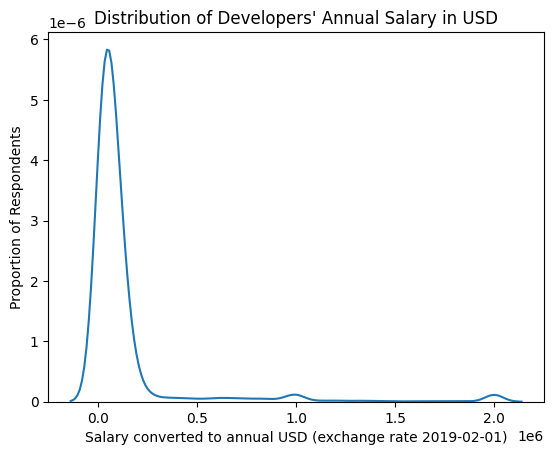

In [8]:
# The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.
# This assumes 12 working months and 50 working weeks.
# Show the distribution graph of developers' annual salary in USD (le6)
sns.kdeplot(data=df['ConvertedComp'])
plt.title('Distribution of Developers\' Annual Salary in USD')
plt.xlabel('Salary converted to annual USD (exchange rate 2019-02-01)')
plt.ylabel('Proportion of Respondents')
plt.show()

In [9]:
# Median of the column ConvertedComp
# Indicating the median of annual salary in USD
df['ConvertedComp'].median()

57745.0

In [10]:
# Demographic data
# Responders identified themselves only as a Man
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [11]:
# Median annual salary of female developers
# Median ConvertedComp of responders identified themselves only as a Woman
woman_df = df[df['Gender'] == 'Woman']
woman_df['ConvertedComp'].median()

57708.0

In [12]:
# Statistics of age
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

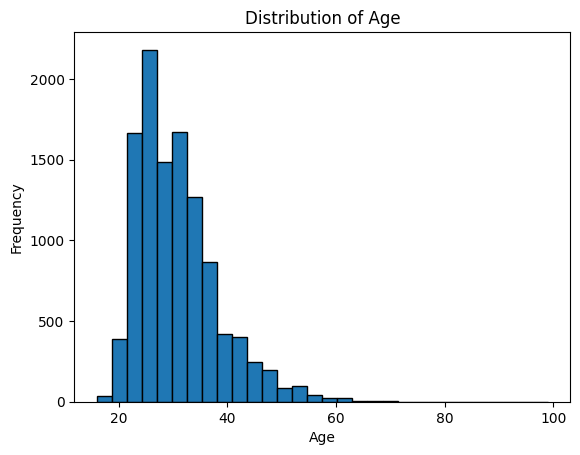

In [13]:
# Distribution of age
plt.hist(df['Age'], bins=30, edgecolor='black')
# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Displaying the plot
plt.show()

<Axes: xlabel='ConvertedComp'>

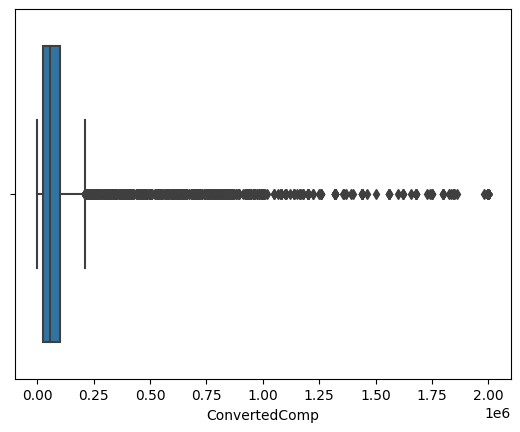

In [14]:
# Find out if outliers exist in the column ConvertedComp using a box plot
sns.boxplot(x=df["ConvertedComp"])

In [15]:
column = df['ConvertedComp']

# Calculating the Interquartile Range (IQR)
q1 = column.quantile(0.25)
q3 = column.quantile(0.75)
iqr = q3 - q1
print(iqr)

73132.0


In [16]:
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Printing the result
print("The upper bound of the 'ConvertedComp' column is:", upper_bound)
print("The lower bound of the 'ConvertedComp' column is:", lower_bound)

The upper bound of the 'ConvertedComp' column is: 209698.0
The lower bound of the 'ConvertedComp' column is: -82830.0


In [17]:
outliers = column[(column > upper_bound) | (column < lower_bound)]
num_outliers = len(outliers)

# Printing the result
print("The number of outliers in the 'ConvertedComp' column is:", num_outliers)

The number of outliers in the 'ConvertedComp' column is: 879


In [18]:
new_df = df[(column >= lower_bound) & (column <= upper_bound)]
new_df.head()
new_df['ConvertedComp'].mean()

59883.20838915799

In [19]:
# Assuming you have a DataFrame named 'df' with the desired data

# Selecting the 'Age' column
age_column = df['Age']

# Selecting all other numerical columns
numerical_columns = df.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corrwith(age_column)

# Printing the correlation values
print("Correlation between 'Age' and other numerical columns:")
print(correlation_matrix)

Correlation between 'Age' and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


In [20]:
df['Age'].median()
df['ConvertedComp'].median()

57745.0

In [21]:
# Finding number of outliers in Age Column
column = df['Age']

# Calculating the Interquartile Range (IQR)
q1 = column.quantile(0.25)
q3 = column.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
outliers = column[(column < lower_bound)]
num_outliers = len(outliers)
num_outliers

0